In [43]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
df_hd = pd.read_csv("healthcare_vitals_dataset.csv")
print(df_hd.head())
#only positive data 
p_df_hd = df_hd[df_hd["label"] == 0]


   heart_rate  systolic_bp  diastolic_bp       spo2  label
0   80.433602   132.870088     86.231492  98.136243      0
1   84.826910   125.083189     87.347636  95.085543      0
2   56.591258   120.290633     74.323361  97.218282      0
3   69.263380   119.743592     80.607642  95.270001      0
4   63.753579   129.813196     84.836123  96.575292      0


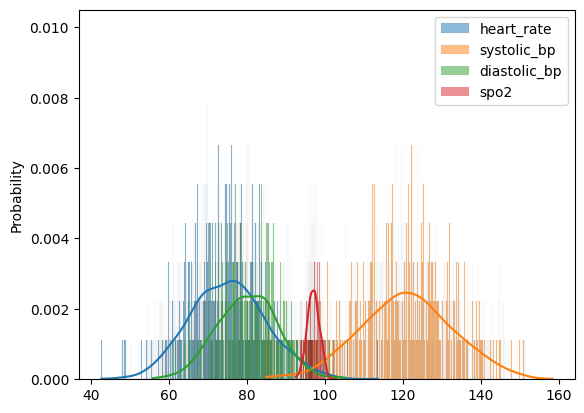

In [44]:
hrt = np.array(p_df_hd["heart_rate"])
sbp = np.array(p_df_hd["systolic_bp"])
dbp = np.array(p_df_hd["diastolic_bp"])
spo2 = np.array(p_df_hd["spo2"])
sns.histplot(hrt, bins = 1000, kde=True, stat="probability", label = "heart_rate")
sns.histplot(sbp, bins = 1000, kde=True, stat="probability", label = "systolic_bp" )
sns.histplot(dbp, bins = 1000, kde=True, stat="probability", label = "diastolic_bp")
sns.histplot(spo2, bins = 1000, kde=True, stat="probability",label = "spo2")
plt.legend()
plt.show()


In [45]:
class Anomaly_detection:
  def __init__(self,x1,x2,x3,x4):
    self.x1_mean = np.mean(x1)
    self.x1_var  = np.var(x1)
    self.x2_mean = np.mean(x2)
    self.x2_var  = np.var(x2)
    self.x3_mean = np.mean(x3)
    self.x3_var  = np.var(x3)
    self.x4_mean = np.mean(x4)
    self.x4_var  = np.var(x4)

  def prob(self,x,mu,var):
    p1 = -(mt.pow((x-mu),2) / (2*var))
    p2 = mt.exp(p1+ 0.0001)
    p3 = 1/(mt.sqrt(2*mt.pi)*mt.sqrt(var))
    probability = p3*p2
    return probability

  def is_anomaly(self,test1,test2,test3,test4,epsilon):
     probability = self.prob(test1,self.x1_mean,self.x1_var)* self.prob(test2,self.x2_mean,self.x2_var)* self.prob(test3,self.x3_mean,self.x3_var)*self.prob(test4,self.x4_mean,self.x4_var)
     if (probability < epsilon):
      return True
     else:
      return False


In [46]:
test = Anomaly_detection(hrt,sbp,dbp,spo2)

In [50]:
test.is_anomaly(80.43,132.87,86.23,98.13, 1e-6)

False